In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-57ffe881-6074-44f9-ba71-d4a2ac29d1ff',
    'IBM_API_KEY_ID': 'EA1WL8YcHjlSBRFeDtR07CIUBlagQa_Q0YSVNgXcjQ1Z',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'predictinglifeexpectancyusingmach-donotdelete-pr-wiiomeiwazafry',
    'FILE': 'Life_Expectancy_Data.csv'
}

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_75dedf163fee4ba8ab75cb70eb672d9d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EA1WL8YcHjlSBRFeDtR07CIUBlagQa_Q0YSVNgXcjQ1Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_75dedf163fee4ba8ab75cb70eb672d9d.get_object(Bucket='predictinglifeexpectancyusingmach-donotdelete-pr-wiiomeiwazafry',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

my_data = pd.read_csv(body)
my_data.head(10)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
len(my_data)

2938

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
my_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<br>

## Data Preprocessing

In [7]:
my_data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
my_data = my_data.fillna(my_data.mean())
my_data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [9]:
my_data.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [10]:
my_data.groupby('Status')['Country'].count()

Status
Developed      512
Developing    2426
Name: Country, dtype: int64

In [11]:
my_data.groupby('Status')['Life expectancy '].mean()

Status
Developed     79.197852
Developing    67.120177
Name: Life expectancy , dtype: float64

In [12]:
status_dummy = pd.get_dummies(my_data['Status'])
my_data.drop(['Status'], inplace=True, axis=1)
my_data = pd.concat([my_data, status_dummy], axis=1)

In [13]:
my_data.groupby('Country')['Life expectancy '].mean().sort_values()

Country
Sierra Leone                                            46.11250
Central African Republic                                48.51250
Lesotho                                                 48.78125
Angola                                                  49.01875
Malawi                                                  49.89375
Chad                                                    50.38750
Côte d'Ivoire                                           50.38750
Zimbabwe                                                50.48750
Swaziland                                               51.32500
Nigeria                                                 51.35625
Somalia                                                 53.31875
Mozambique                                              53.39375
South Sudan                                             53.87500
Zambia                                                  53.90625
Cameroon                                                54.01875
Mali             

In [14]:
my_data.drop(['Country'], inplace=True, axis=1)
my_data.drop(['Year'], inplace=True, axis=1)
my_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [15]:
my_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

<br>

## Correlation between Featrues

In [16]:
sns.set(rc={'figure.figsize':(20,25)})

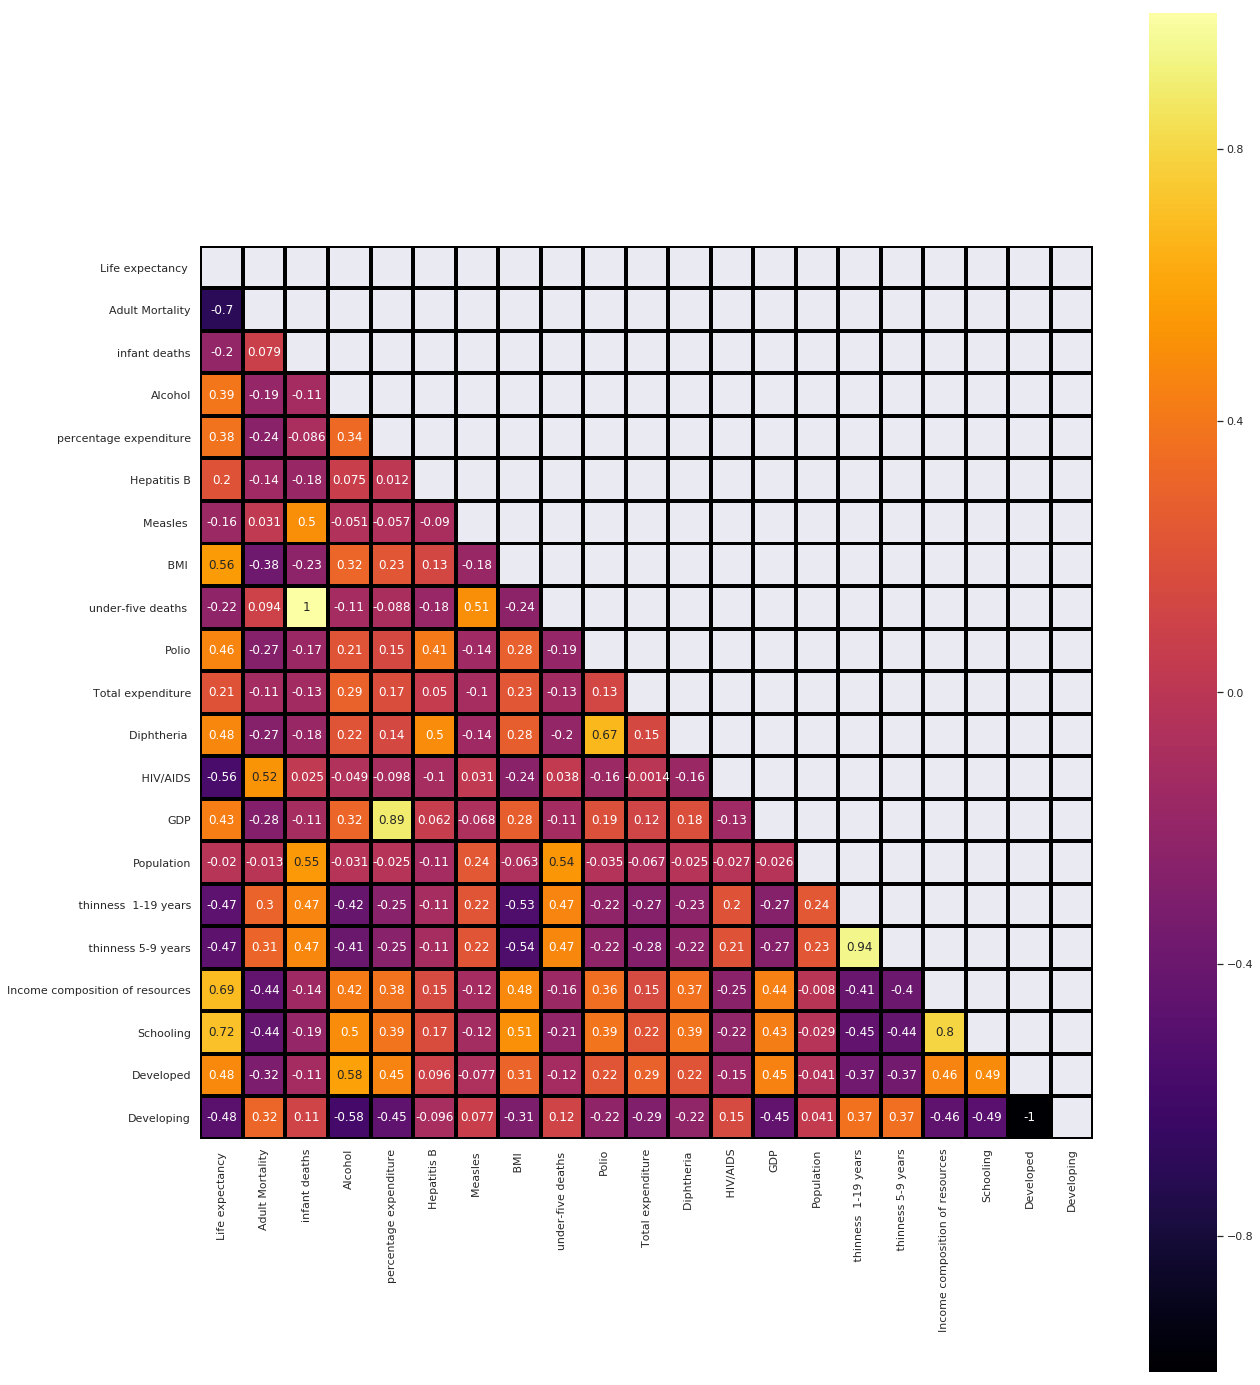

In [17]:
#Create correlation matrix for all variables in the dataframe

mat = np.triu(my_data.corr())
sns.heatmap(my_data.corr(), cmap='inferno', linewidths=3, linecolor='black', annot=True, square=True , mask=mat)

<br>

## Train/Test Split

In [18]:
X_data = my_data.drop('Life expectancy ', axis=1)
X_data.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [19]:
y_data = my_data['Life expectancy ']
y_data.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=101)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 20)
(588, 20)
(2350,)
(588,)


<br>

## Regression Model

In [24]:
model = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=None)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
y_pred = model.predict(X_test)
y_pred

array([51.12746032, 61.66819164, 77.49722829, 65.71744698, 70.86986709,
       70.80676705, 72.32900546, 77.51924709, 64.26820003, 79.81247782,
       64.22039521, 69.02793651, 77.7801174 , 74.49595257, 57.08574109,
       69.68908358, 64.85177022, 70.92128041, 68.70339005, 75.77974403,
       53.85784537, 61.50909506, 77.11701228, 69.27098648, 65.61493812,
       51.66539591, 74.53817212, 73.69037216, 63.27023436, 71.67006958,
       60.12089173, 64.3743936 , 73.66073787, 73.28663518, 76.15989516,
       72.75356021, 75.2839602 , 63.96309808, 68.2128649 , 61.70180023,
       63.22437986, 81.55118168, 62.78136808, 71.02723862, 68.76177149,
       71.45375213, 72.1000483 , 76.28868255, 75.6406307 , 68.82225167,
       73.10598598, 75.65714451, 50.484476  , 81.5432835 , 64.67689105,
       59.65681372, 77.98666986, 72.9689315 , 76.47172423, 57.36364969,
       70.51429462, 69.03511948, 69.55394081, 83.58278865, 72.46134755,
       63.26806108, 72.48184306, 73.81393801, 77.01422707, 69.86

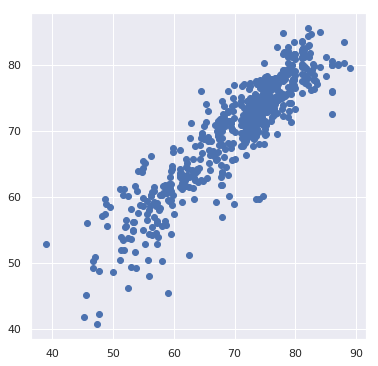

In [26]:
sns.set(rc={'figure.figsize':(6,6)})
plt.scatter(y_test, y_pred)

In [27]:
print("Training score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))

Training score: 0.8181910195144158
Testing Score: 0.8233632288768696


In [28]:
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)

Intercept = 55.62622821504716
Coefficients =  [-1.93940052e-02  1.08173308e-01  6.81972609e-02  5.15929594e-05
 -1.81919292e-02 -2.15299663e-05  4.58506101e-02 -8.10950805e-02
  3.09939435e-02  6.53658728e-02  3.87753326e-02 -4.64884638e-01
  4.36236247e-05  1.38722461e-10 -1.11876338e-01  3.07207363e-02
  5.91846046e+00  6.47765953e-01  6.31497119e-01 -6.31497119e-01]


In [31]:
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

Mean Squared Error:  15.268641418092853
Root Mean Squared Error:  3.9075108980133186
R2 score:  0.8233632288768697


In [32]:
!pip install watson-machine-learning-client

In [33]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-08-04 16:55:04,700 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [34]:
wml_credentials={
  "apikey": "Agwll1vHq7lOMuoBguxQVJ7we5d3GK3cq2H_LZ8OdkBP",
  "instance_id": "69233e16-90f4-4399-acbf-a0fad74c3e77",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [35]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [36]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shubham", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shubhamdua02@gmail.com", 
               client.repository.ModelMetaNames.NAME: "LifeExpectancy_RegressionModel"}

In [37]:
model_artifact = client.repository.store_model(model, meta_props=model_props)

In [38]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'14d911d5-3066-41fa-81a8-6b9918aeb4f9'

In [39]:
deployment = client.deployments.create(published_model_uid, name="LifeExpectancy_RegressionModel")



#######################################################################################

Synchronous deployment creation for uid: '14d911d5-3066-41fa-81a8-6b9918aeb4f9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='be0839d0-f551-4442-8b02-15f86157cef6'
------------------------------------------------------------------------------------------------




In [40]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [41]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/69233e16-90f4-4399-acbf-a0fad74c3e77/deployments/be0839d0-f551-4442-8b02-15f86157cef6/online'